<a href="https://colab.research.google.com/github/inshra12/Protein-Localization-Classification-E.-coli-/blob/main/protein_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install ucimlrepo

In [17]:
# Load libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Fetch E. coli dataset from UCI (Dataset ID = 39)
ecoli = fetch_ucirepo(id=39)

# Separate features and target
X = ecoli.data.features
y = ecoli.data.targets

# Display top 5 rows
print("🔹 Feature Data:")
print(X)

print("\n🔸 Target Labels:")
print(y)


🔹 Feature Data:
      mcg   gvh   lip  chg   aac  alm1  alm2
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
..    ...   ...   ...  ...   ...   ...   ...
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
335  0.74  0.74  0.48  0.5  0.31  0.53  0.52

[336 rows x 7 columns]

🔸 Target Labels:
    class
0      cp
1      cp
2      cp
3      cp
4      cp
..    ...
331    pp
332    pp
333    pp
334    pp
335    pp

[336 rows x 1 columns]


In [19]:
# Check shape
print(f"Number of proteins: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Check class distribution
print("\nClass distribution:")
print(y.value_counts())


Number of proteins: 336
Number of features: 7

Class distribution:
class
cp       143
im        77
pp        52
imU       35
om        20
omL        5
imS        2
imL        2
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} proteins")
print(f"Testing set size: {X_test.shape[0]} proteins")


Training set size: 268 proteins
Testing set size: 68 proteins


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,  y_train.values.ravel())     # train the model
y_pred = model.predict(X_test)  # test model

print("✅ Model training completed!")



✅ Model training completed!


🎯 Model Accuracy: 85.29%

📝 Classification Report:
              precision    recall  f1-score   support

          cp       0.91      0.97      0.94        32
          im       0.75      0.69      0.72        13
         imS       0.00      0.00      0.00         1
         imU       0.60      0.75      0.67         4
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       0.80      0.73      0.76        11

    accuracy                           0.85        68
   macro avg       0.72      0.73      0.73        68
weighted avg       0.84      0.85      0.85        68



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


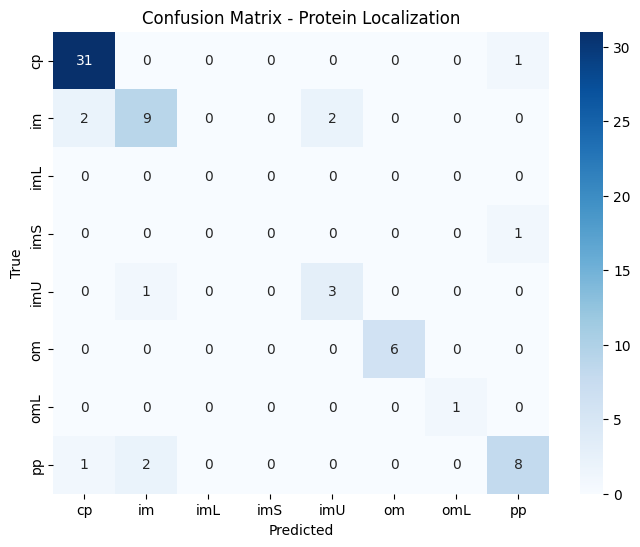

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")

# ✅ Classification Report
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# ✅ Heatmap Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Protein Localization")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [26]:
# Example: A protein with 7 features (same order as in training set)
new_protein = [[0.49, 0.29, 0.48, 0.50, 0.000, 0.000, 0.50]]

# Predict the location
predicted_location = model.predict(new_protein)
print(f" Predicted Protein Location: {predicted_location[0]}")


 Predicted Protein Location: cp


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
